<a href="https://colab.research.google.com/github/InMyDream21/Deep-Learning/blob/main/Tensorflow/zerotomastery/computer_vision/Introduction_to_computer_vision_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer Vision is the practice of writing algorithm which can discover pattern in visual data. Such as the camera of a self-driving car recognizing the car in front.


## Get the data

The images we're working with are from the Food101 dataset (101 different classes of food): https://www.kaggle.com/dansbecker/food-101/version/1

However we've modified it to only use two classes (Pizza and Steak) using the image data modification notebook: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

> **Note:** We start with a smaller dataset so we can experiment quickly and figure what works (or better yet what doesnt work) before scaling up.

In [ ]:
import zipfile

#Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close() 

--2022-01-07 07:23:39--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.147.128, 142.250.125.128, 142.250.152.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.147.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   156MB/s    in 0.7s    

2022-01-07 07:23:40 (156 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (Become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data. 

And for a computer vision project.. this usually means visualizing many samples of your data.

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [ ]:
# Another way to find out how many images in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

To visualize our images, first lets get the class names programmatically


In [ ]:
# Get the classnames programmatically
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) #Create a list of class_names for the subdirectories
print(class_names)

['pizza' 'steak']


In [ ]:
#Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") #Show the shape of the image
  
  return img

Image shape: (512, 512, 3)


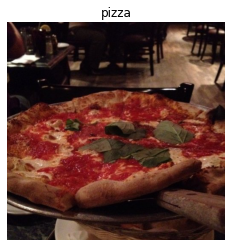

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir = "pizza_steak/train/",
                        target_class = "pizza")

In [ ]:
# View the image shape
img.shape #returns width, height, colour channels

(512, 512, 3)

In [ ]:
# Get all the pixel values between 0 and 1
img/255

array([[[0.09803922, 0.00784314, 0.03137255],
        [0.11764706, 0.03137255, 0.04313725],
        [0.16470588, 0.0627451 , 0.0745098 ],
        ...,
        [0.08235294, 0.04705882, 0.05882353],
        [0.0745098 , 0.03921569, 0.05098039],
        [0.05882353, 0.02352941, 0.03529412]],

       [[0.09411765, 0.01176471, 0.03137255],
        [0.10196078, 0.01176471, 0.03529412],
        [0.12941176, 0.02745098, 0.03921569],
        ...,
        [0.07843137, 0.04313725, 0.05490196],
        [0.07843137, 0.04313725, 0.05490196],
        [0.06666667, 0.03137255, 0.04313725]],

       [[0.10588235, 0.02352941, 0.05098039],
        [0.10588235, 0.01568627, 0.03921569],
        [0.11372549, 0.01568627, 0.03137255],
        ...,
        [0.07843137, 0.04313725, 0.0627451 ],
        [0.08235294, 0.04705882, 0.06666667],
        [0.07843137, 0.04313725, 0.0627451 ]],

       ...,

       [[0.23529412, 0.23529412, 0.20392157],
        [0.22745098, 0.22745098, 0.19607843],
        [0.17254902, 0

## An end to end example 
Lets build a convolutional neural network to find patterns in our images, more specifically we need a way to:

* Load our images
* preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit our CNN to our training data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 and 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale = 1/255)
valid_datagen = ImageDataGenerator(rescale = 1/255)

#Setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = "binary",
                                               seed = 42)

valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode="binary",
                                               seed = 42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters = 10,
                         kernel_size = 3,
                         activation = "relu",
                         input_shape = (224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation = "relu"),
  tf.keras.layers.MaxPool2D(pool_size = 2,
                            padding = "valid"),
  tf.keras.layers.Conv2D(10, 3, activation = "relu"),
  tf.keras.layers.Conv2D(10, 3, activation = "relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation = "sigmoid")
])

# Compile our CNN model
model_1.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data, 
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 25s 247ms/step - loss: 0.6192 - accuracy: 0.6220 - val_loss: 0.4321 - val_accuracy: 0.8180
Epoch 2/5
47/47 [==============================] - 11s 226ms/step - loss: 0.4344 - accuracy: 0.8067 - val_loss: 0.3608 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 11s 227ms/step - loss: 0.3881 - accuracy: 0.8273 - val_loss: 0.3179 - val_accuracy: 0.8700
Epoch 4/5
47/47 [==============================] - 11s 225ms/step - loss: 0.3502 - accuracy: 0.8507 - val_loss: 0.3586 - val_accuracy: 0.8440
Epoch 5/5
47/47 [==============================] - 11s 237ms/step - loss: 0.3213 - accuracy: 0.8733 - val_loss: 0.3758 - val_accuracy: 0.8240


In [ ]:
# Get model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Using the same model as before 

Lets replicate the model weve built in a previous section to see if it works with our image data.

The model we're building is from the TensorFlow playground

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape = (224, 224, 3)),
  tf.keras.layers.Dense(4, activation = "relu"),
  tf.keras.layers.Dense(4, activation = "relu"),
  tf.keras.layers.Dense(1, activation = "sigmoid")
])

# Compile the model
model_2.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 206ms/step - loss: 1.2688 - accuracy: 0.5047 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 202ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 200ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 199ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 200ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [ ]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameters than our CNN model_1,
model_2 perform terribly Lets try to improve it

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape = (224, 224, 3)),
  tf.keras.layers.Dense(100, activation = "relu"),
  tf.keras.layers.Dense(100, activation = "relu"),
  tf.keras.layers.Dense(100, activation = "relu"),
  tf.keras.layers.Dense(1, activation = "sigmoid")
])

# Compile the model
model_3.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 208ms/step - loss: 3.9208 - accuracy: 0.6213 - val_loss: 0.7461 - val_accuracy: 0.6720
Epoch 2/5
47/47 [==============================] - 9s 201ms/step - loss: 1.0484 - accuracy: 0.6427 - val_loss: 0.8370 - val_accuracy: 0.7200
Epoch 3/5
47/47 [==============================] - 9s 201ms/step - loss: 0.7778 - accuracy: 0.7160 - val_loss: 0.8929 - val_accuracy: 0.5720
Epoch 4/5
47/47 [==============================] - 9s 201ms/step - loss: 0.5724 - accuracy: 0.7560 - val_loss: 0.5125 - val_accuracy: 0.7640
Epoch 5/5
47/47 [==============================] - 9s 201ms/step - loss: 0.4938 - accuracy: 0.7793 - val_loss: 0.5831 - val_accuracy: 0.7400


In [ ]:
# Get a summary of model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


## Binary classification: Lets break it down

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepared it for our model, the mai nstep here was scaling/normalizing)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experiment)

### 1. Become one with the data

Image shape: (384, 512, 3)
Image shape: (512, 512, 3)


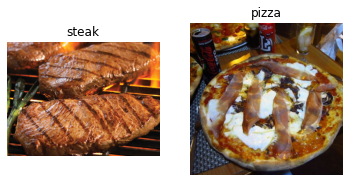

In [ ]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for a model)

In [ ]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches.**

A batch is a small subset of data. Rather than look at all ~10,000 images at one time, a model might only look at 32 at a time. 

It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into the memory of your processor (GPU).
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

Why 32? 

Because 32 is good for your health...

In [ ]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255)

In [ ]:
# Load in out image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               target_size = (224, 224),
                                               class_mode = "binary",
                                               batch_size = 32)

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                             target_size = (224, 224),
                                             class_mode = "binary",
                                             batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# get a sample of a train data batch
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [ ]:
# how many batches are there?
len(train_data)

47

In [ ]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [ ]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline.

> **Note:** In deep learning, there is almost an infinite amount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g. look at which current model is performing best in the field for your problem).

In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Create the model (This will be our baseline, a layer convolutional neural network)
model_4 = Sequential([
  Conv2D(filters = 10, # The number of sliding window going thru the input
         kernel_size = 3, # The size of the sliding window
         strides = 1, #Size of the steps the sliding window take each step
         padding = "valid", # If "same" output shape will remain the same as input, if "valid", output will be compressed
         activation = "relu",
         input_shape = (224, 224, 3)),
  Conv2D(10, 3, activation = "relu"),
  Conv2D(10, 3, activation = "relu"),
  Flatten(),
  Dense(1, activation = "sigmoid")
])

#Compile the model
model_4.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

### 4. Fit the model

In [ ]:
# Check the length of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [ ]:
# Fit the model
history_4 = model_4.fit(train_data,
            epochs = 5,
            steps_per_epoch = len(train_data),
            validation_data = test_data,
            validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 13s 244ms/step - loss: 1.5192 - accuracy: 0.6240 - val_loss: 0.4819 - val_accuracy: 0.7940
Epoch 2/5
47/47 [==============================] - 11s 233ms/step - loss: 0.4620 - accuracy: 0.7980 - val_loss: 0.4304 - val_accuracy: 0.8120
Epoch 3/5
47/47 [==============================] - 11s 232ms/step - loss: 0.3645 - accuracy: 0.8480 - val_loss: 0.3894 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 11s 233ms/step - loss: 0.2150 - accuracy: 0.9300 - val_loss: 0.3953 - val_accuracy: 0.8280
Epoch 5/5
47/47 [==============================] - 11s 236ms/step - loss: 0.1054 - accuracy: 0.9660 - val_loss: 0.5214 - val_accuracy: 0.7880


### 5. Evaluating our model

It looks like our model is learning something, lets evaluate it

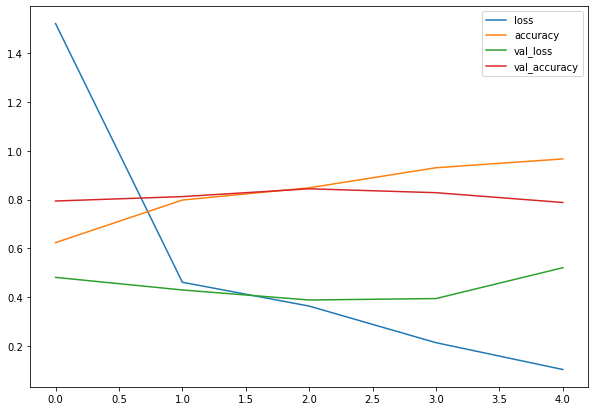

In [ ]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize = (10, 7))

In [ ]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) #How many epochs did we run for

  # Plot loss
  plt.plot(epochs, loss, label = "training_loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label = "accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()


> **Note:** When a model's **validation_loss starts to increase**, it's likely that the model is **overfitting** the training dataset. This means its learning the patterns in the training dataset *too well* and thus the model's ability to generalize to unseen data will be diminished

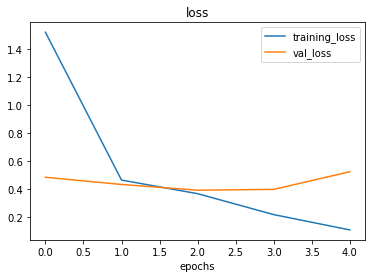

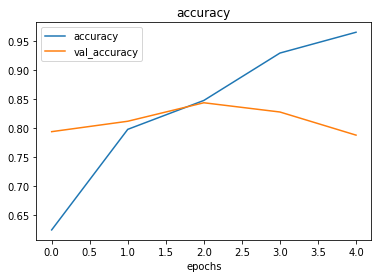

In [ ]:
# Check out the loss and accuracy of model_4
plot_loss_curves(history_4)

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:
* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data...

> **Note:** Reducing overfitting is also known as **Regularization**.

In [ ]:
# Create the model (This is going to be our new baseline)
model_5 = Sequential([
  Conv2D(10, 3, activation = "relu", input_shape = (224, 224, 3)),
  MaxPool2D(pool_size = 2),
  Conv2D(10, 3, activation = "relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation = "relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation = "sigmoid")
])

In [ ]:
# Compile the model
model_5.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

In [ ]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 220ms/step - loss: 0.6417 - accuracy: 0.6353 - val_loss: 0.4721 - val_accuracy: 0.8000
Epoch 2/5
47/47 [==============================] - 10s 212ms/step - loss: 0.4954 - accuracy: 0.7587 - val_loss: 0.3971 - val_accuracy: 0.8360
Epoch 3/5
47/47 [==============================] - 10s 218ms/step - loss: 0.4336 - accuracy: 0.8000 - val_loss: 0.3641 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 10s 223ms/step - loss: 0.3913 - accuracy: 0.8320 - val_loss: 0.3316 - val_accuracy: 0.8680
Epoch 5/5
47/47 [==============================] - 10s 222ms/step - loss: 0.3954 - accuracy: 0.8273 - val_loss: 0.3242 - val_accuracy: 0.8720


In [ ]:
# Get a summary of our model with max pooling
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

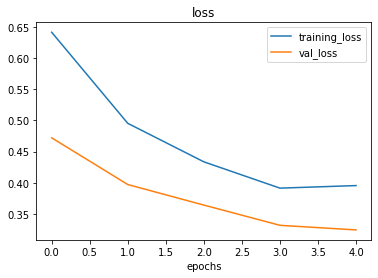

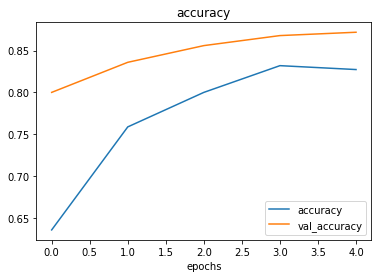

In [ ]:
# Plot the loss curves
plot_loss_curves(history_5)

### Opening our bag of tricks and finding data augmentation

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale = 1/255,
                                             rotation_range = 0.2,
                                             shear_range = 0.2,
                                             zoom_range = 0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.2,
                                             horizontal_flip = True)

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale = 1/255)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale = 1/255)

> **Question:** What is data augmentation?

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it, or something simmilar.

In [ ]:
# Import data and augment it from training directory
print("Augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size = (224, 224),
                                                                   batch_size = 32,
                                                                   class_mode = "binary",
                                                                   shuffle = False) # For demonstration purposes only

# Create non-augmented train data batches
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224, 224),
                                               batch_size = 32,
                                               class_mode = "binary",
                                               shuffle = False)

# Create non-augmented test data batches
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224, 224),
                                             batch_size = 32,
                                             class_mode = "binary")

Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


> **Note:** Data augmentation is usually only performed on the training data. Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.

In [ ]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() #Note: Labels are not augmented.

Showing image number: 22


(-0.5, 223.5, 223.5, -0.5)

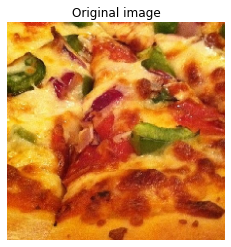

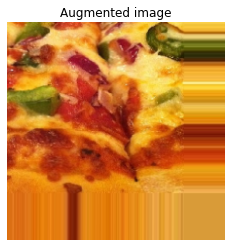

In [ ]:
# Show original images and augmented images
random_number = random.randint(0, 31) # Our batch size is 32..
print(f"Showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False)

Now weve seen what augmented training data looks like, lets build a model and see how it learns on augmented data

In [ ]:
# Create a model (same as model_5)
model_6 = Sequential([
  Conv2D(10, 3, activation = "relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation = "relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation = "relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation = "sigmoid")
])

# Compile the model
model_6.compile(loss = "binary_crossentropy",
             optimizer = Adam(),
             metrics = ["accuracy"])

# Fit the model
history_6 = model_6.fit(train_data_augmented,
                       epochs = 5,
                       steps_per_epoch = len(train_data_augmented),
                       validation_data = test_data,
                       validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 25s 525ms/step - loss: 0.7072 - accuracy: 0.4873 - val_loss: 0.6833 - val_accuracy: 0.6400
Epoch 2/5
47/47 [==============================] - 24s 518ms/step - loss: 0.7023 - accuracy: 0.5267 - val_loss: 0.6844 - val_accuracy: 0.6120
Epoch 3/5
47/47 [==============================] - 24s 518ms/step - loss: 0.6886 - accuracy: 0.5640 - val_loss: 0.6745 - val_accuracy: 0.6760
Epoch 4/5
47/47 [==============================] - 24s 515ms/step - loss: 0.6882 - accuracy: 0.5887 - val_loss: 0.6880 - val_accuracy: 0.5080
Epoch 5/5
47/47 [==============================] - 24s 517ms/step - loss: 0.7075 - accuracy: 0.5560 - val_loss: 0.6630 - val_accuracy: 0.6500


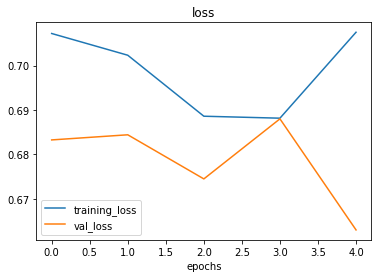

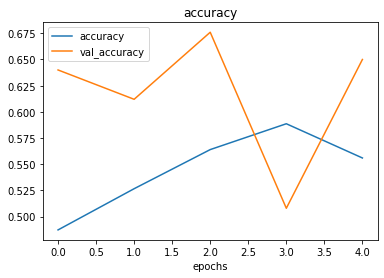

In [ ]:
# Check our models training curves
plot_loss_curves(history_6)

Lets shuffle our augmented training data and train another model and see what happens.

In [ ]:
# Import data and augment it and shuffle it from the training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size = (224, 224),
                                                                            class_mode = "binary",
                                                                            shuffle = True) # Shuffle data this time

Found 1500 images belonging to 2 classes.


In [ ]:
# Create the model
model_7 = Sequential([
  Conv2D(10, 3, activation = "relu", input_shape = (224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation = "relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation = "relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation = "sigmoid")
])

# Compile the model
model_7.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs = 5,
                        steps_per_epoch = len(train_data_augmented_shuffled),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 25s 525ms/step - loss: 0.6565 - accuracy: 0.5993 - val_loss: 0.5194 - val_accuracy: 0.7520
Epoch 2/5
47/47 [==============================] - 25s 522ms/step - loss: 0.5727 - accuracy: 0.6980 - val_loss: 0.4219 - val_accuracy: 0.8460
Epoch 3/5
47/47 [==============================] - 25s 528ms/step - loss: 0.4948 - accuracy: 0.7693 - val_loss: 0.3743 - val_accuracy: 0.8380
Epoch 4/5
47/47 [==============================] - 25s 528ms/step - loss: 0.4606 - accuracy: 0.7920 - val_loss: 0.4069 - val_accuracy: 0.8140
Epoch 5/5
47/47 [==============================] - 24s 521ms/step - loss: 0.4706 - accuracy: 0.7873 - val_loss: 0.3338 - val_accuracy: 0.8620


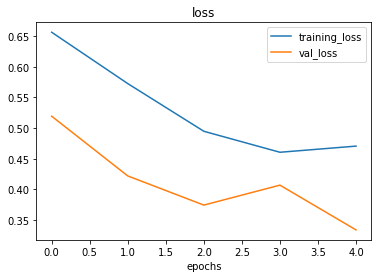

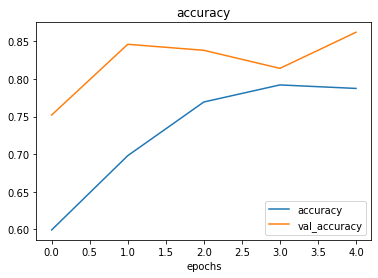

In [ ]:
# Plot the loss curves
plot_loss_curves(history_7)

### 7. Repeat until satisfied

Since weve already beaten our baseline there are a few things we could try to continue to improve our model:

* Increase the number of model layers (3.g. add more `Conv2D` / `MaxPool2D` layers)
* Increase the number of filters in each convolutional layer (e. g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data (give the model more opportunity to learn)
* Use **transfer learning** to leverage what another image model has learn and adjust it for our own use case

In [ ]:
# Create a model
model_8 = Sequential([
  Conv2D(10, 3, activation = "relu"),
  Conv2D(10, 3, activation = "relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation = "relu"),
  Conv2D(10, 3, activation = "relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation = "sigmoid")
])

# Compile the model
model_8.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs = 10,
                        steps_per_epoch = len(train_data_augmented_shuffled),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/10
47/47 [==============================] - 27s 557ms/step - loss: 0.6490 - accuracy: 0.6087 - val_loss: 0.5139 - val_accuracy: 0.7380
Epoch 2/10
47/47 [==============================] - 26s 554ms/step - loss: 0.5072 - accuracy: 0.7573 - val_loss: 0.3569 - val_accuracy: 0.8480
Epoch 3/10
47/47 [==============================] - 26s 547ms/step - loss: 0.4982 - accuracy: 0.7700 - val_loss: 0.3592 - val_accuracy: 0.8400
Epoch 4/10
47/47 [==============================] - 26s 547ms/step - loss: 0.4686 - accuracy: 0.7827 - val_loss: 0.3375 - val_accuracy: 0.8700
Epoch 5/10
47/47 [==============================] - 25s 538ms/step - loss: 0.4530 - accuracy: 0.7893 - val_loss: 0.3383 - val_accuracy: 0.8540
Epoch 6/10
47/47 [==============================] - 25s 535ms/step - loss: 0.4268 - accuracy: 0.8147 - val_loss: 0.4045 - val_accuracy: 0.8380
Epoch 7/10
47/47 [==============================] - 25s 538ms/step - loss: 0.4337 - accuracy: 0.8027 - val_loss: 0.3046 - val_accuracy: 0.8800

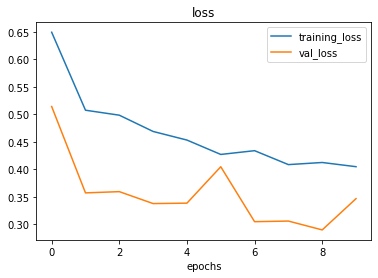

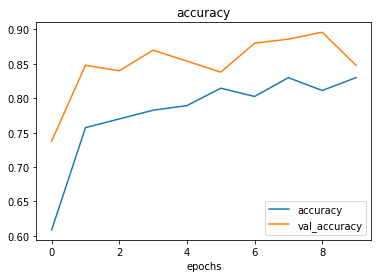

In [ ]:
plot_loss_curves(history_8)

## Making a prediction with our trained model on our own custom data

In [ ]:
# Classes were working with
print(class_names)

['pizza' 'steak']


--2022-01-07 08:43:48--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.2’

03-steak.jpeg.2     100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2022-01-07 08:43:48 (31.4 MB/s) - ‘03-steak.jpeg.2’ saved [1978213/1978213]



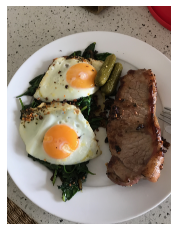

In [ ]:
# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [ ]:
# Check the shape of our image
steak.shape 

(4032, 3024, 3)

> **Note:** When you train a neural network and you want to make a prediction with it on your own custom data, its important that your custom data (or new data) is preprocessed into the same format as the data your model was trained on.

In [ ]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape = 224):
  """ 
  Reads an image from filename, turns it into a tensor and reshapes it to 
  (img_shape, img_shape, colour_channels).
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size = [img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  img = img/255
  return img

In [ ]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
pred = model_7.predict(tf.expand_dims(steak, axis = 0))
pred

array([[0.8577013]], dtype=float32)

Looks like our custom image is being put through our model, however, it currently outputs a prediction probability, wouldnt it be nice if we could visualize the image as well as the model's prediction?

In [ ]:
# Remind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
# We can index the predicted class by rounding the prediction probability and indexing it on our class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
def pred_and_plot(model, filename, class_names = class_names):
  """
  Import an image located at filename, makes a prediction with model and plots
  the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis = 0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

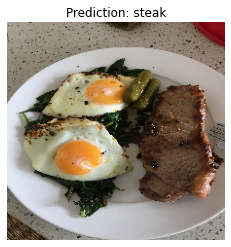

In [ ]:
# Test our model on a custom image
pred_and_plot(model_7, "03-steak.jpeg")

Our model works! Lets try it on another image... this time pizza

--2022-01-07 09:04:24--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.06s   

2022-01-07 09:04:24 (44.3 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



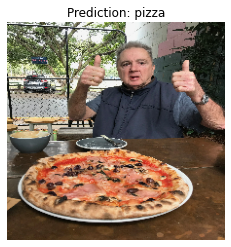

In [ ]:
# Download another test custom image and make prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7, "03-pizza-dad.jpeg")

# Multi-class Image Classification

1. Become one with the data
2. Preprocess the data (Get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameter and improve the model (try to beat the baseline / reduce overfitting)
7. Repeat until satisfied

### 1. Import and become one with the data

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-01-08 14:10:40--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.197.128, 64.233.191.128, 173.194.192.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   157MB/s    in 3.2s    

2022-01-08 14:10:43 (157 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os

# Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in '10_food_classes_all_data'
There are 10 directories and 0 images in '10_food_classes_all_data/train'
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'
There are 1

In [ ]:
# Setup the train and test directories 
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
# Lets get the class names
import pathlib 
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (512, 512, 3)


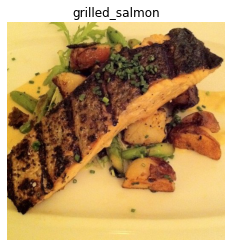

In [ ]:
# Visualize, visualize, visualize
import random
img = view_random_image(train_dir,
                        random.choice(class_names))

### 2. Preprocess the data (prepare it for a model)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale 
train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224, 224),
                                               class_mode = "categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             (224, 224))

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model (start with a baseline)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Create our model
model_9 = Sequential([
  Conv2D(10, 3, activation = "relu", input_shape = (224, 224, 3)),
  Conv2D(10, 3, activation = "relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation = "relu"),
  Conv2D(10, 3, activation = "relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation = "softmax")
])

# Compile the model
model_9.compile(loss = "categorical_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

### 4. Fit the model

In [ ]:
# Fit the model# Fit the model
hist_9 = model_9.fit(train_data,
                     epochs = 5,
                     steps_per_epoch = len(train_data),
                     validation_data = test_data,
                     validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 59s 243ms/step - loss: 2.1713 - accuracy: 0.1955 - val_loss: 2.0269 - val_accuracy: 0.2636
Epoch 2/5
235/235 [==============================] - 56s 236ms/step - loss: 1.9080 - accuracy: 0.3352 - val_loss: 1.8805 - val_accuracy: 0.3452
Epoch 3/5
235/235 [==============================] - 58s 245ms/step - loss: 1.5602 - accuracy: 0.4771 - val_loss: 1.9216 - val_accuracy: 0.3532
Epoch 4/5
235/235 [==============================] - 57s 244ms/step - loss: 1.0480 - accuracy: 0.6533 - val_loss: 2.1823 - val_accuracy: 0.3116
Epoch 5/5
235/235 [==============================] - 57s 244ms/step - loss: 0.5046 - accuracy: 0.8451 - val_loss: 3.1363 - val_accuracy: 0.2876


### 5. Evaluate the model

In [ ]:
# Evaluate on the test data
model_9.evaluate(test_data)

79/79 [==============================] - 13s 167ms/step - loss: 3.1363 - accuracy: 0.2876


[3.136309862136841, 0.28760001063346863]

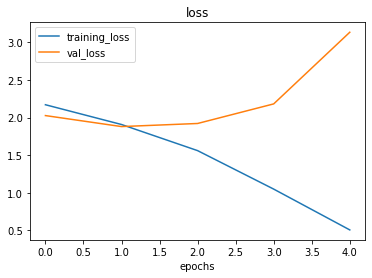

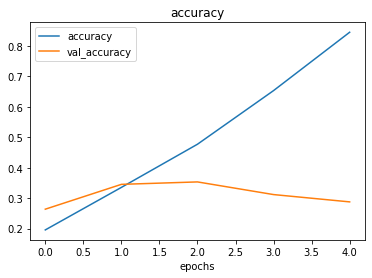

In [ ]:
  # Check out the model's loss curves one the 10 classes
  plot_loss_curves(hist_9)

What do these loss curves tell us?
Well.. it seems our model is **overfitting** the training set quite badly.. In other words, its getting great results on the training data but fails to generalize well to unseen data and perform poorly on the test data.

### 6. Adjust the model hyperparameters (to beat the baseline / reduce overfitting)

Due to its performance on the training data, its clear the our model is learning something..

However its not generalizing well to unseen data (Overfitting).

So, lets try and fix overfitting by

* **Get more data** - Having more data gives a model more opportunity to learn diverse patterns..
* **Simplify the model** - If our current model is overfitting the data, it may be too complicated of a model, one way to simplify a model is to: reduce number of layers or reduce number of hidden units in layers.
* **Use data augmentation** - Data augmentation manipulate the training data in such a way to add more diversity to it (without altering the original data)
* **Use transfer learning** - Transfer learning leverages the patterns another model has learned on similar data to your own and allows you to use those patterns on your own dataset

In [ ]:
# How about we try and simplify the model first
# Lets try to remove 2 convolutional layers..
model_10 = Sequential([
  Conv2D(10, 3, activation = "relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation = "relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation = "softmax")
])

model_10.compile(loss = "categorical_crossentropy",
                 optimizer = Adam(),
                 metrics = ["accuracy"])

In [ ]:
# Fit the model with 2x conv layers removed
history_10 = model_10.fit(train_data,
                          epochs = 5,
                          steps_per_epoch = len(train_data),
                          validation_data = test_data,
                          validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 51s 215ms/step - loss: 2.1096 - accuracy: 0.2453 - val_loss: 1.9411 - val_accuracy: 0.3172
Epoch 2/5
235/235 [==============================] - 52s 221ms/step - loss: 1.8045 - accuracy: 0.3828 - val_loss: 1.8875 - val_accuracy: 0.3412
Epoch 3/5
235/235 [==============================] - 51s 219ms/step - loss: 1.4551 - accuracy: 0.5244 - val_loss: 1.8815 - val_accuracy: 0.3556
Epoch 4/5
235/235 [==============================] - 50s 213ms/step - loss: 0.9980 - accuracy: 0.6948 - val_loss: 2.0931 - val_accuracy: 0.3296
Epoch 5/5
235/235 [==============================] - 49s 208ms/step - loss: 0.5608 - accuracy: 0.8455 - val_loss: 2.5327 - val_accuracy: 0.3008


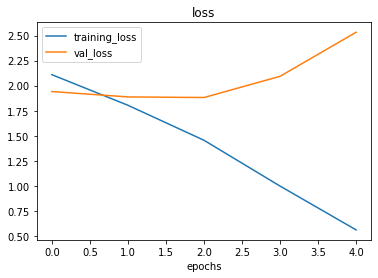

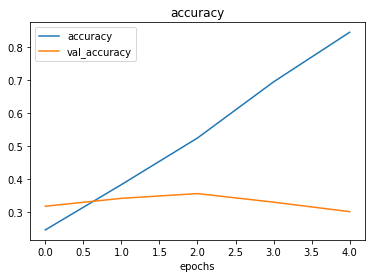

In [ ]:
# Check the loss curver of model_10
plot_loss_curves(history_10)

Looks like our "simplifying the model" experiment didnt work... The accuracy went down and overfitting continued...

How about we try data augmentation??

### Trying to reduce overfitting with data augmentation

Lets try and improve our model's result by using augmented training data.

ideally, we want to:
* Reduce overfitting (get the train and validation loss curves closer)
* Improve validation accuracy

In [ ]:
# Create an augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale = 1/255,
                                             rotation_range = 0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.2,
                                             zoom_range = 0.2,
                                             horizontal_flip = True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size = (224, 224))

Found 7500 images belonging to 10 classes.


In [ ]:
# Lets create another model but this time we'll fit it on the augmented training data of 10 classes
model_11 = tf.keras.models.clone_model(model_9)

# Compile the model
model_11.compile(loss = "categorical_crossentropy",
                 optimizer = Adam(),
                 metrics = ["accuracy"])

In [ ]:
# Fit the model
history_11 = model_11.fit(train_data_augmented,
                          epochs = 5,
                          steps_per_epoch = len(train_data),
                          validation_data = test_data,
                          validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 131s 555ms/step - loss: 2.3087 - accuracy: 0.0964 - val_loss: 2.3023 - val_accuracy: 0.0960
Epoch 2/5
235/235 [==============================] - 126s 537ms/step - loss: 2.2349 - accuracy: 0.1467 - val_loss: 2.1137 - val_accuracy: 0.2124
Epoch 3/5
235/235 [==============================] - 125s 530ms/step - loss: 2.1369 - accuracy: 0.2184 - val_loss: 2.0309 - val_accuracy: 0.2536
Epoch 4/5
235/235 [==============================] - 124s 526ms/step - loss: 2.0934 - accuracy: 0.2445 - val_loss: 1.9871 - val_accuracy: 0.2732
Epoch 5/5
235/235 [==============================] - 125s 532ms/step - loss: 2.0528 - accuracy: 0.2684 - val_loss: 1.9446 - val_accuracy: 0.3036


In [ ]:
model_9.evaluate(test_data)

79/79 [==============================] - 13s 155ms/step - loss: 2.3088 - accuracy: 0.0984


[2.308778762817383, 0.09839999675750732]

In [ ]:
model_11.evaluate(test_data)

79/79 [==============================] - 12s 154ms/step - loss: 1.9446 - accuracy: 0.3036


[1.9445905685424805, 0.303600013256073]

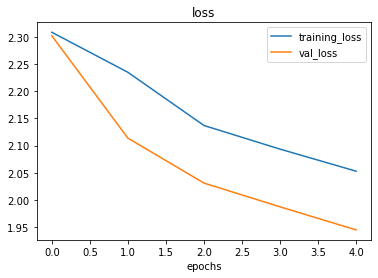

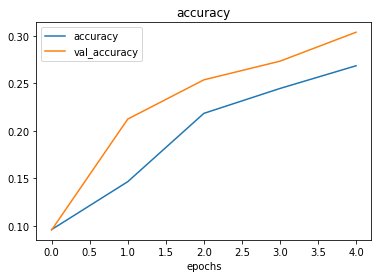

In [ ]:
# Check out our model trained on augmented data's loss curves
plot_loss_curves(history_11)

Woah! That looks much better, the loss curves are much closer to each other than the baseline model and they look like theyre heading in the right direnction (certainly not the wrong direnction) so if we were to train for longer, we might see further improvement

### 7. Repeat until satisfied

We could keep going here... continually trying to bring our loss curves closer together and trying to improve the validation/test accuracy.

How?

By running lots of experiments, namely:
- Restructuring our model's architecture (increasing layers / hidden units)
- Adjust the learning rate
- Try different methods of data augmentation (adjust the hyperparameters in our ImageDataGenerator instance)
- Train for longer
- Try **transfer learning**

### Making a prediction with our trained model

Lets use our trained model to make some predictions on our own custom images!

In [ ]:
# Remind ourselves of the classes our model is trained on
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
# Download some custom images
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

--2022-01-08 14:54:39--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.07s   

2022-01-08 14:54:39 (41.0 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

--2022-01-08 14:54:39--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting

In [ ]:
# Reconfig pred and plot function to wok with multi-class images
def pred_and_plot(model, filename, class_names = class_names):
  """
  Import an image located at filename, makes a prediction with model and plots
  the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis = 0))

  # Add in logic for multi-class
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

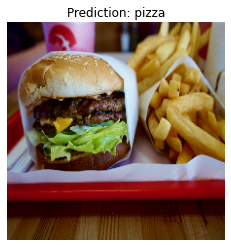

In [ ]:
# Make a prediction using model_11
pred_and_plot(model_11, "03-hamburger.jpeg", class_names)

Looks like our model didn't perform very well on our custom images but this is because it only achieved ~30% accuracy on the test data. So we can expect it to function quite poorly on other unseen data.

### Saving and loading our model

In [ ]:
# Save a model
model_11.save("saved_trained_model_11")

INFO:tensorflow:Assets written to: saved_trained_model_11/assets


In [ ]:
# Load in a trained model and evaluate it
loaded_model_11 = tf.keras.models.load_model("saved_trained_model_11")
loaded_model_11.evaluate(test_data)

79/79 [==============================] - 13s 157ms/step - loss: 1.9446 - accuracy: 0.3036


[1.9445902109146118, 0.303600013256073]

In [ ]:
# Compare our loaded model to our existing model
model_11.evaluate(test_data)

79/79 [==============================] - 13s 160ms/step - loss: 1.9446 - accuracy: 0.3036


[1.9445900917053223, 0.303600013256073]